**<font size="6" color=#33053E><b>CA01: Exploring Statistical Analysis Techniques</b></font>**

**<font size="5" color=#211C4C>Collaborators:</font>**  
*<font size="3" color=#401655>Erfan Ahmadi, 81010078</font>*<br>
*<font size="3" color=#401655>Arash Shahin, 810199442</font>*<br>
*<font size="3" color=#401655>Hamed Miramirkhani, 810199500</font>*

In this assignment, we will familiarize ourselves with different statistical analysis techniques and put them into practice.

In our first task, we'll utilize Monte Carlo Simulation, a powerful computational technique, to estimate the value of pi. Additionally, we'll use this method to determine the probability of winning for each player in the Mensch Game. By running numerous simulations and averaging the results, we aim to obtain reliable estimates for both pi and the probabilities of winning.

Moving on to the second task, we'll delve into the Central Limit Theorem (CLT). By generating samples from different probability distributions and varying sample sizes, we seek to observe how the distribution of sample means converges to a normal distribution. This exploration will deepen our understanding of the fundamental concepts underlying statistical inference.

In the final task, we'll employ hypothesis testing to make informed decisions based on sample data. Hypothesis testing is a critical tool in statistics and scientific research, allowing us to draw conclusions about population parameters. Through three distinct scenarios, we'll apply hypothesis testing to analyze data and make evidence-based decisions.

# Tasks

**Import the required libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import norm

## Monte Carlo Simulation

Monte Carlo Simulation is a method that uses random sampling to approximate the outcome of complex systems or processes. It's widely used across various fields to analyze problems and make predictions based on probabilistic outcomes.

### Pi Calculation:
A brief overview of how Monte Carlo simulation is used to estimate the value of Pi by generating random points and calculating the ratio of points falling within an inscribed circle to the total number of points. The implementation includes a class `MonteCarloPi` with a method `calculate_pi()` that performs the simulation and plots the generated points to visualize the estimation process.

**Implement:**

In [35]:
class MonteCarloPi:
    def __init__(self, num_points):
        self.num_points = num_points

    def calculate_pi(self):
        inside_circle = 0
        x_inside = []
        y_inside = []
        x_outside = []
        y_outside = []
        
        for _ in range(self.num_points):
            x = np.random.uniform(-1, 1)
            y = np.random.uniform(-1, 1)
            if x**2 + y**2 <= 1:
                inside_circle += 1
                x_inside.append(x)
                y_inside.append(y)
            else:
                x_outside.append(x)
                y_outside.append(y)
                
        pi_estimate = 4 * inside_circle / self.num_points
        self.plot_points(x_inside, y_inside, x_outside, y_outside, pi_estimate)
        return pi_estimate
    
    def plot_points(self, x_inside, y_inside, x_outside, y_outside, pi_estimate):
        plt.figure(figsize=(6, 6))
        plt.scatter(x_inside, y_inside, color='blue', label='Inside Circle', alpha=0.6, s=10)
        plt.scatter(x_outside, y_outside, color='red', label='Outside Circle', alpha=0.6, s=10)
        plt.xlabel('X', fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.title(f'Monte Carlo Estimation of Pi: {pi_estimate:.4f}', fontsize=12)
        plt.legend(fontsize=12)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        plt.show()

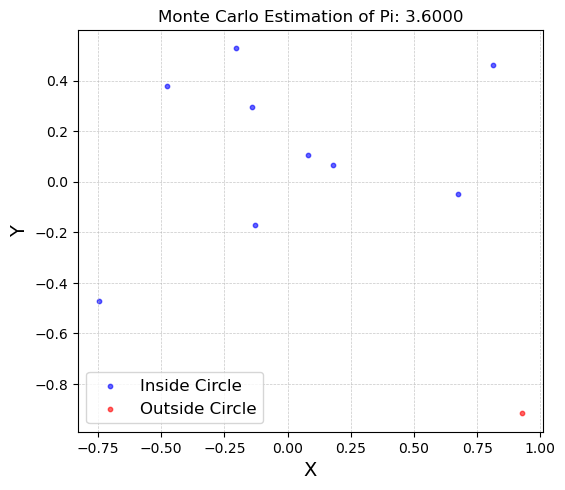

Estimated value of Pi using 10 points: 3.6 




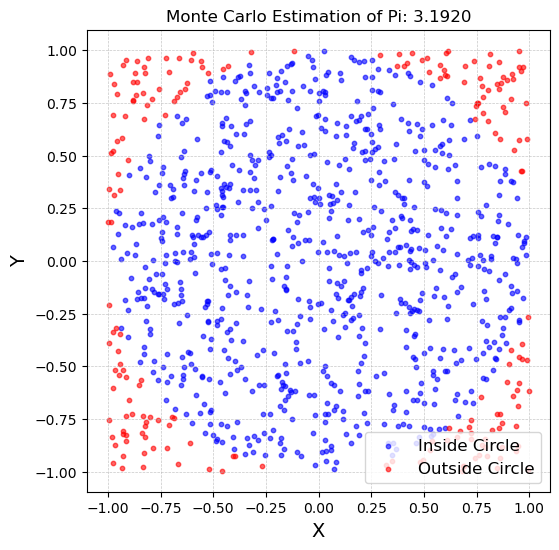

Estimated value of Pi using 1000 points: 3.192 




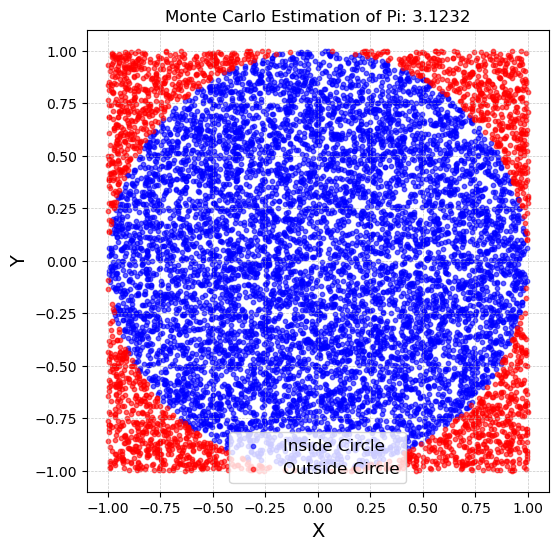

Estimated value of Pi using 10000 points: 3.1232 




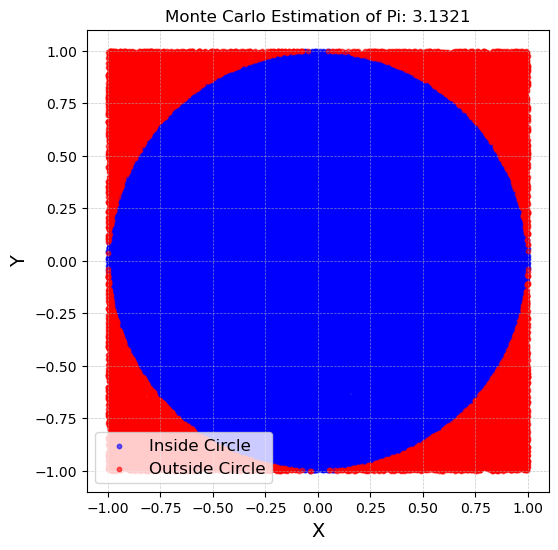

Estimated value of Pi using 100000 points: 3.13212 




In [36]:
num_points_list = [10, 1000, 10000, 100000]
for num_points in num_points_list:
    monte_carlo_pi = MonteCarloPi(num_points)
    pi_estimate = monte_carlo_pi.calculate_pi()
    print(f"Estimated value of Pi using {num_points} points:", pi_estimate, "\n\n")

A brief overview of how Monte Carlo simulation is used to estimate the value of Pi by generating random points and calculating the ratio of points falling within an inscribed circle to the total number of points. The implementation includes a class `MonteCarloPi` with a method `calculate_pi()` that performs the simulation and plots the generated points to visualize the estimation process.

### Mensch Game:
We'll analyze a simplified version of the game where each player has only one piece and moves it based solely on dice rolls. The objective is to calculate the winning probability for each of the four players. This involves performing a Monte Carlo Simulation over the game to estimate these probabilities.

**implement:**

In [171]:
OUT_OF_PLAY = -1
class MenschGameSimulation:
    def __init__(self, num_players=4, finish_line=100):
        self.num_players = num_players
        self.finish_line = finish_line
        self.player_positions = [OUT_OF_PLAY] * self.num_players
        self.starting_positions = [0, 25, 50, 75]
        self.player_finished = [False] * self.num_players
        self.num_pass_finish_line = [0] * self.num_players
        
    def roll_dice(self):
        return np.random.randint(1, 7)

    def move_piece(self, player, dice_roll):
        if self.player_positions[player] == OUT_OF_PLAY:
            if dice_roll == 6:    
                self.player_positions[player] = self.starting_positions[player]
                
        else:
            self.player_positions[player] += dice_roll
            
            if self.player_positions[player] >= self.finish_line:
                self.num_pass_finish_line[player] += 1
                self.player_positions[player] -= self.finish_line
                if self.player_positions[player] > self.starting_positions[player]:
                    self.num_pass_finish_line[player] -= 1
                    self.player_positions[player] += self.finish_line - dice_roll
                    
            if self.num_pass_finish_line[player] == 1 and self.player_positions[player] > self.starting_positions[player]:
                self.player_positions[player] -= dice_roll

        
        if dice_roll == 6:
                self.move_piece(player, self.roll_dice())
        
    def knock_opponent(self, player):
        for i in range(self.num_players):
            if i != player and self.player_positions[player] == self.player_positions[i] and self.player_positions[player] != OUT_OF_PLAY:
                self.player_positions[i] = OUT_OF_PLAY

    def simulate_game(self):
        while not all(self.player_finished):
            
            for player in range(self.num_players):
                if not self.player_finished[player]:
                    dice_roll = self.roll_dice()
                    self.move_piece(player, dice_roll)
                    self.knock_opponent(player)
                    if self.player_positions[player] == self.starting_positions[player] and self.num_pass_finish_line[player] == 1:
                        self.player_finished[player] = True
                        return player + 1

    def calculate_probabilities(self, num_simulations):
        player_wins = [0] * self.num_players
        for _ in range(num_simulations):
            winner = self.simulate_game()
            if winner is not None:
                player_wins[winner - 1] += 1
                self.reset_positions()
        probabilities = [win_count / num_simulations for win_count in player_wins]
        return probabilities

    def reset_positions(self):
        self.player_positions = [OUT_OF_PLAY] * self.num_players
        self.player_finished = [False] * self.num_players
        self.num_pass_finish_line = [0] * self.num_players

    def plot_probabilities(self, num_simulations_list):
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        line_width = 1.5 

        fig, axs = plt.subplots(2, 2, figsize=(8, 6))  
        for player in range(self.num_players):
            win_probabilities = []

            for num_simulations in num_simulations_list:
                mensch_game = MenschGameSimulation()
                probabilities = mensch_game.calculate_probabilities(num_simulations)
                win_probabilities.append(probabilities[player])

            ax = axs[player // 2, player % 2]
            ax.plot(num_simulations_list, win_probabilities, label=f'Player {player + 1}', color=colors[player], linewidth=line_width)
            ax.set_xlabel('Number of Simulations')
            ax.set_ylabel('Win Probability')
            ax.legend()
            ax.grid(True)

            print(f"Player {player + 1} - Probability of winning for each number of simulations:", win_probabilities, "\n")

        plt.tight_layout() 
        plt.show()


Player 1 - Probability of winning for each number of simulations: [0.3, 0.25, 0.2, 0.21] 

Player 2 - Probability of winning for each number of simulations: [0.2, 0.23, 0.204, 0.228] 

Player 3 - Probability of winning for each number of simulations: [0.4, 0.29, 0.27, 0.252] 

Player 4 - Probability of winning for each number of simulations: [0.4, 0.27, 0.31, 0.317] 



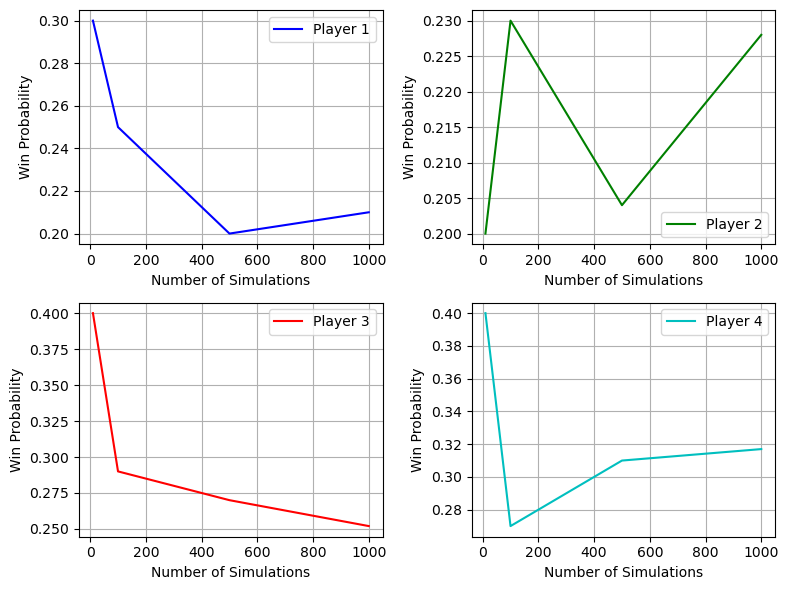

In [172]:
num_simulations_list = [10, 100, 500, 1000]
mensch_game = MenschGameSimulation()
mensch_game.plot_probabilities(num_simulations_list)

Based on the above results, it is evident that as the number of simulations increases, the probability of each player winning approaches approximately 0.25.<br> This observation aligns with expectations, as a larger number of games allows each player to have a better approximation of their winning chances compared to others. Therefore, we can conclude that with a higher number of simulations, the estimation of each player's winning probability becomes more precise and closer to theoretical expectations.

### Conclusion

**Monte Carlo simulation** is a numerical method used to estimate or solve problems that are difficult to analyze empirically. It relies on generating random samples and repeating experiments to approximate values.

**In the case of calculate_pi:**
We use Monte Carlo simulation to estimate the value of Pi.
- *Random points* are generated within a unit square, and it is determined how many of these points lie within a circle with a radius of 1 (which fits inside the square).
- By increasing the number of random points, we can achieve a *more accurate estimate* of Pi. The precision of our estimate of Pi increases with the number of random points.
- Key factors include generating random samples and performing a large number of experiments to help us arrive at a more accurate estimate of Pi.

**In the case of MenschGameSimulation:**
Monte Carlo simulation is used to estimate the *probability* of each player winning in the Mensch game. 
- Each game of Mensch is a *random game*, with the outcome determined by the dice rolls and player movements.
- By repeating the game a large number of times, we can estimate the probability of each player winning.
- Key factors include generating random samples from dice rolls and repeating the game multiple times to help us arrive at a more accurate estimate of each player's winning probability.

Overall, Monte Carlo simulation is valuable for estimating complex and empirical values, providing us with a means to achieve *more precise results* than may be possible through analytical or empirical methods alone. Obviously, more simulations result in more precise results.



## Central Limit Theorem(CLT)

The Central Limit Theorem (CLT) states that when independent random variables are added together, their sum tends toward a normal distribution, regardless of the original distribution of the variables. This theorem is fundamental in statistics as it allows for making inferences about population parameters based on sample statistics, even when the population distribution is unknown or non-normal.

To observe CLT in action, we will generate samples with normal, uniform and binomial distribution (each time with different sample size) and plot their histograms to see if they have normal distribution or not.

**implement:**

In [140]:
class CLTSimulation:
    def __init__(self, num_samples=1000, sample_sizes=[5, 50, 100, 500], distributions=['normal', 'uniform', 'binomial']):
        self.num_samples = num_samples
        self.sample_sizes = sample_sizes
        self.distributions = distributions
        self.colors = ['orange', 'green', 'purple', 'blue']

    def generate_samples(self, distribution, sample_size):
        if distribution == 'normal':
            return np.random.normal(loc=0, scale=1, size=(self.num_samples, sample_size))
        elif distribution == 'uniform':
            return np.random.uniform(low=0, high=1, size=(self.num_samples, sample_size))
        elif distribution == 'binomial':
            return np.random.binomial(n=10, p=0.5, size=(self.num_samples, sample_size))

    def calculate_sample_means(self, samples):
        return np.mean(samples, axis=1)

    def plot_histogram(self, sample_means, sample_size, distribution):
        color = self.colors[self.sample_sizes.index(sample_size)]
        plt.hist(sample_means, bins=30, density=True, alpha=0.6, label=f'Sample Size = {sample_size}', color=color)
        expected_mean = np.mean(sample_means)
        expected_std_dev = np.std(sample_means) 
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, expected_mean, expected_std_dev)
        plt.plot(x, p, 'k', linewidth=2)
        plt.title(f'Distribution of Sample Means ({distribution.capitalize()} Distribution)')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()

    def simulate(self):
        for distribution in self.distributions:
            fig = plt.figure(figsize=(12, 8))
            for sample_size in self.sample_sizes:
                samples = self.generate_samples(distribution, sample_size)
                sample_means = self.calculate_sample_means(samples)
                self.plot_histogram(sample_means, sample_size, distribution)
            plt.show()

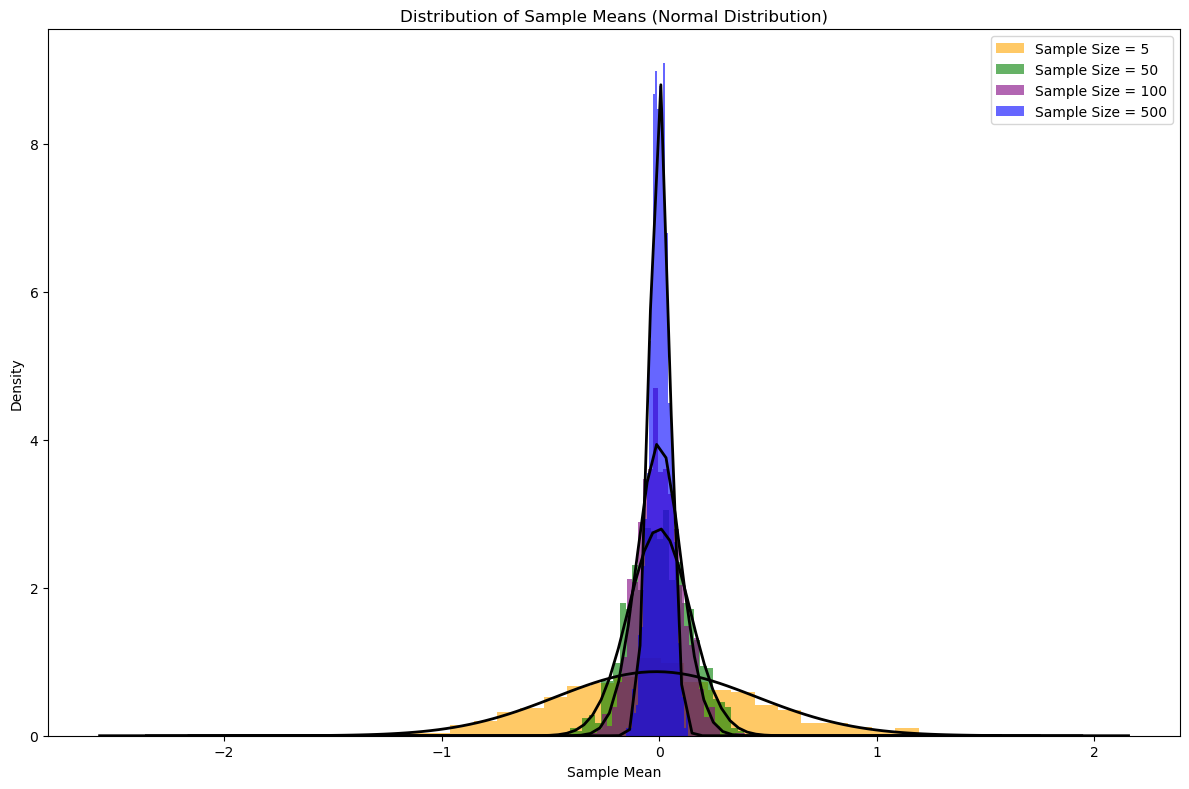

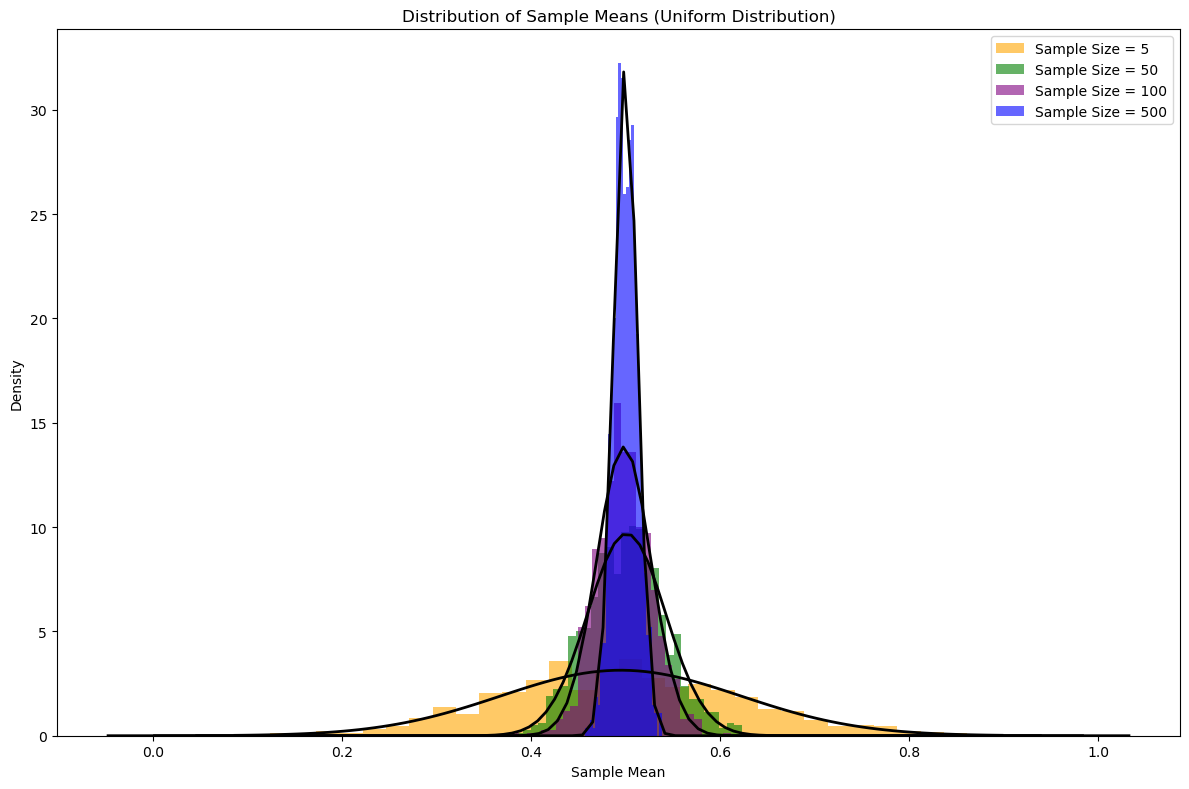

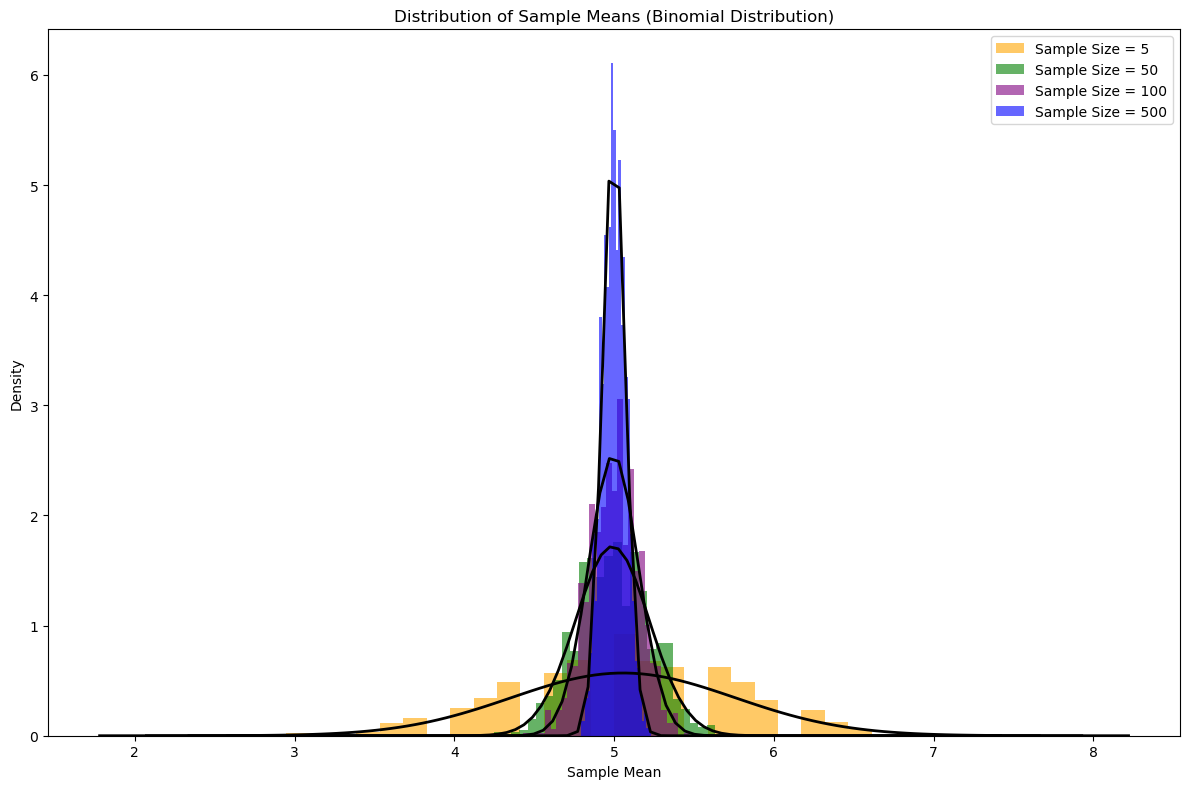

In [141]:
simulation = CLTSimulation()
simulation.simulate()

### Observations and Insights:
#### Normal Distribution:
- As the sample size increases, the distribution of sample means becomes more symmetric and bell-shaped.
- The histograms of sample means closely resemble the expected normal distribution, indicating convergence as per the CLT.
#### Uniform Distribution:
- Similar to the normal distribution, as the sample size increases, the distribution of sample means tends to approach a normal distribution.
- However, there might be slightly more variability in the histograms compared to the normal distribution due to the nature of the uniform distribution.
#### Binomial Distribution:
- Despite the underlying distribution being discrete, we observe a similar trend where the distribution of sample means approaches a normal distribution with increasing sample size.
- The histograms of sample means show a bell-shaped curve, indicating convergence towards the expected normal distribution.

### Alignment with CLT:
- The observed behavior aligns well with the principles of the Central Limit Theorem.
- Regardless of the underlying distribution (normal, uniform, or binomial), the distribution of sample means tends to approximate a normal distribution as the sample size increases.
- This alignment confirms the validity of the Central Limit Theorem, which states that the sampling distribution of the mean approaches a normal distribution with a large sample size, irrespective of the shape of the population distribution.

### Conclusion
The experiments conducted using the `CLTSimulation` class showcase the profound implications of the Central Limit Theorem (CLT) in statistical analysis. The CLT asserts that regardless of the underlying distribution of the population, the distribution of the sample means tends to follow a normal (Gaussian) distribution as the sample size increases. This remarkable property holds true for a wide range of distributions, including normal, uniform, and binomial distributions, as demonstrated in our experiments.

As we increase the sample size in our simulations, we observe a remarkable convergence towards a normal distribution for the sample means. This convergence implies that, regardless of the initial distribution of the population, the sampling distribution of the mean becomes increasingly normal as the sample size grows. This fundamental principle of the CLT has profound implications for statistical inference and analysis.

In practical terms, the CLT allows us to make reliable inferences about population parameters based on sample data. It provides a solid foundation for various statistical techniques, such as hypothesis testing, confidence intervals, and parameter estimation. By understanding and leveraging the CLT, statisticians and data scientists can draw meaningful conclusions from data and make informed decisions in diverse fields ranging from finance and economics to medicine and engineering.

Overall, the observed convergence towards a normal distribution as sample size increases reaffirms the robustness and universality of the CLT, highlighting its critical role in modern statistical practice and data analysis.

## Hypothesis Testing

Hypothesis testing is a vital statistical method used in research to draw conclusions about population parameters from sample data. It aids decision-making by assessing data in different scenarios. Researchers formulate a null hypothesis `(H0)` representing the default assumption about the population parameter and an alternative hypothesis `(H1 or Ha)` suggesting a different scenario. By collecting and analyzing sample data, they evaluate evidence against the null hypothesis to determine if it should be rejected. This process involves selecting a statistical test, defining significance level `(α)`, conducting the test, and interpreting results. Hypothesis testing enables researchers to validate theories, make evidence-based decisions, and contribute to knowledge across various fields.

### Unfair coin

In this task, we simulate a biased coin favoring one side by 10% more than the other. The objective is to conduct hypothesis testing to ascertain if the coin is fair. Both confidence interval and p-value approaches will be used for the test.

**Implement:**

In [162]:
SIG_LEVEL = 0.05
class UnfairCoinSimulation:
    def __init__(self, bias=0.55):
        self.bias = bias

    def flip_coin(self, num_flips):
        return np.random.choice(['Heads', 'Tails'], size=num_flips, p=[self.bias, 1 - self.bias])

    def calculate_z_score(self, sample_proportion, sample_size):
        expected_proportion = 0.5
        standard_error = np.sqrt(expected_proportion * (1 - expected_proportion) / sample_size)
        z_score = (sample_proportion - expected_proportion) / standard_error
        return z_score

    def perform_hypothesis_testing(self, num_flips):
        flips = self.flip_coin(num_flips)
        num_heads = np.sum(flips == 'Heads')
        sample_proportion = num_heads / num_flips
        
        z_score = self.calculate_z_score(sample_proportion, num_flips)
        p_value = 2 * norm.cdf(-np.abs(z_score)) 
        
        if p_value < SIG_LEVEL:
            decision = 'Reject H0: The coin is unfair.'
        else:
            decision = 'Fail to reject H0: The coin is fair.'
        
        return z_score, p_value, decision

    def plot_simulation_results(self, sample_sizes):
        z_scores = []
        p_values = []

        for sample_size in sample_sizes:
            z_score, p_value, decision = self.perform_hypothesis_testing(sample_size)
            z_scores.append(z_score)
            p_values.append(p_value)
            print(f"Sample size: {sample_size}, Z-score: {z_score:.4f}, P-value: {p_value:.4f}, Decision: {decision}")

        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(sample_sizes, z_scores, color='red', marker='o')
        plt.xlabel('Sample Size')
        plt.ylabel('Z-score')
        plt.title('Z-score vs. Sample Size')

        plt.subplot(1, 2, 2)
        plt.plot(sample_sizes, p_values, color='blue', marker='o')
        plt.xlabel('Sample Size')
        plt.ylabel('P-value')
        plt.title('P-value vs. Sample Size')
        plt.axhline(y=SIG_LEVEL, color='red', linestyle='--')
        plt.text(0, 0.055, 'Significance Level', rotation=0)

        plt.tight_layout()
        plt.show()

Sample size: 30, Z-score: 0.3651, P-value: 0.7150, Decision: Fail to reject H0: The coin is fair.
Sample size: 300, Z-score: 0.3464, P-value: 0.7290, Decision: Fail to reject H0: The coin is fair.
Sample size: 1000, Z-score: 3.2888, P-value: 0.0010, Decision: Reject H0: The coin is unfair.


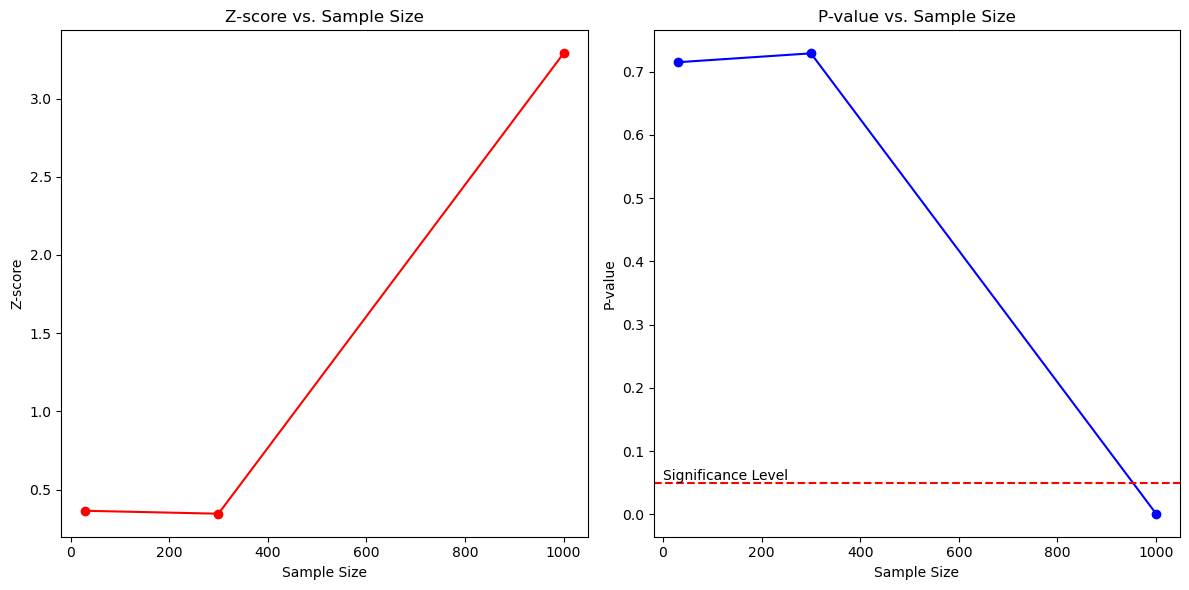

In [166]:
simulation = UnfairCoinSimulation()
simulation.plot_simulation_results([30, 300, 1000])

The results of the unfair coin simulation show that the outcome of the hypothesis test varies for three different sample sizes (30, 300, and 1000):

1. For sample sizes of 30 and 300, **the Z-score is less than the critical value** (typically 1.96 for a 95% confidence level), and the P-value is greater than the desired significance level (usually 0.05). Therefore, we decide not to reject the null hypothesis (indicating that the coin is fair) and cannot provide a definitive conclusion about the fairness of the coin.

2. For a sample size of 1000, **the Z-score exceeds the critical value**, and the P-value is significantly lower than the desired significance level. Consequently, we strongly reject the null hypothesis. These results suggest that the coin is likely biased towards one of the two sides and is unfair.

### T-Test

A t-test is a fundamental statistical technique used to evaluate whether there is a significant difference between the means of two groups or samples. It calculates the t-statistic, which measures the magnitude of the difference relative to the variation in the data, and then assesses the probability of observing such a statistic under the assumption of no true difference (null hypothesis). This probability is determined using the t-distribution, allowing researchers to draw conclusions about the significance of the observed difference and make informed decisions in various fields such as science, medicine, and social sciences.

**Implement:**

In [16]:
class TTest:
    def __init__(self, group1, group2, alpha=0.05):
        self.group1 = group1
        self.group2 = group2
        self.alpha = alpha

    def perform_test(self):
        t_statistic, p_value = stats.ttest_ind(self.group1, self.group2)

        if p_value < self.alpha:
            decision = "Reject H0: There is a significant difference between the means of the two groups."
        else:
            decision = "Fail to reject H0: There is no significant difference between the means of the two groups."

        return t_statistic, p_value, decision

In [17]:
group1 = [15, 18, 20, 22, 25]
group2 = [10, 12, 14, 16, 18]

t_test = TTest(group1, group2)
t_statistic, p_value, decision = t_test.perform_test()

print("T-Statistic: {:.3f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))
print("Decision:", decision)

T-Statistic: 2.711
P-Value: 0.027
Decision: Reject H0: There is a significant difference between the means of the two groups.


Based on the obtained results, we can conclude that there is a significant difference between the means of the two groups. This conclusion is derived from assessing the p-value, which is less than the significance level of 0.05. Therefore, the null hypothesis (the means of the two groups are equal) is rejected, indicating a statistically significant difference between the means of the two groups.

### Job placement

In [19]:
class JobPlacementSimulation:
    def __init__(self, data_file):
        self.data = pd.read_csv(data_file)

    def split_groups(self):
        self.placed_group = self.data[self.data['placement_status'] == 'Placed']
        self.not_placed_group = self.data[self.data['placement_status'] == 'Not Placed']

    def calculate_t_statistic(self, group1, group2):
        mean1, mean2 = np.mean(group1), np.mean(group2)
        std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
        n1, n2 = len(group1), len(group2)
        pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
        t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))
        degrees_of_freedom = n1 + n2 - 2
        return t_statistic, degrees_of_freedom

    def calculate_p_value(self, t_statistic, degrees_of_freedom):
        p_value = stats.t.sf(np.abs(t_statistic), degrees_of_freedom) * 2
        return p_value

    def perform_test(self):
        self.split_groups()
        t_statistic, degrees_of_freedom = self.calculate_t_statistic(self.placed_group['gpa'], self.not_placed_group['gpa'])
        p_value = self.calculate_p_value(t_statistic, degrees_of_freedom)

        alpha = 0.05
        if p_value < alpha:
            decision = "Reject H0: There is a significant difference between the means of the two groups."
        else:
            decision = "Fail to reject H0: There is no significant difference between the means of the two groups."

        return t_statistic, degrees_of_freedom, p_value, decision

    def perform_test_using_SciPy(self):
            self.split_groups()
            t_statistic_scipy, p_value_scipy = ttest_ind(self.placed_group['gpa'], self.not_placed_group['gpa'])
    
            alpha = 0.05
            if p_value_scipy < alpha:
                decision = "Reject H0: There is a significant difference between the means of the two groups."
            else:
                decision = "Fail to reject H0: There is no significant difference between the means of the two groups."
    
            return t_statistic_scipy, p_value_scipy, decision

In [20]:
t_test_simulation = JobPlacementSimulation("job_placement.csv")
t_statistic, degrees_of_freedom, p_value, decision = t_test_simulation.perform_test()

print("T-Statistic: {:.4f}".format(t_statistic))
print("Degrees of Freedom:", degrees_of_freedom)
print("P-Value:", p_value)
print("Decision:", decision)

T-Statistic: 5.1053
Degrees of Freedom: 698
P-Value: 4.2636444940967887e-07
Decision: Reject H0: There is a significant difference between the means of the two groups.


Based on the simulation results, the T-Statistic value is considerably large, and the P-value is very small (close to zero). These results indicate a significant difference between the means of the two groups (students who are employed and those who are not). Therefore, by rejecting the null hypothesis (H0), we conclude that there is indeed a significant difference in the average grades between the two groups. This suggests that simultaneously working and studying may likely have a negative impact on students' grades, particularly under similar conditions and considering the variables examined in this study.

In [21]:
t_statistic_scipy, p_value_scipy, decision_scipy = t_test_simulation.perform_test_using_SciPy()

print("T-Statistic (SciPy):{:.4f}".format(t_statistic_scipy))
print("P-Value (SciPy):", p_value_scipy)
print("Decision (SciPy):", decision_scipy)

T-Statistic (SciPy):5.1053
P-Value (SciPy): 4.2636444940967887e-07
Decision (SciPy): Reject H0: There is a significant difference between the means of the two groups.


### compare
As we can see, both methods yield the same t-statistic, p-value, and decision. This consistency confirms the accuracy of the hypothesis test results obtained using the SciPy library. Therefore, we can rely on the SciPy library for conducting t-tests, which offers convenience and computational efficiency.

# Questions

#### Question 1: Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?

estimating the duration or cost of a project<br>
analyzing weather patterns, traffic flow or energy distribution<br>
estimating the reliability and failure rate of a product<br>
modeling the spread of diseases<br>
model different designs, identify potential bottlenecks, and perform capacity planning and resource allocation<br>
provide the basis for resampling techniques for estimating the accuracy of a model on a given data set<br>
simulate different cyber attacks, evaluate the probability of them occurring, evaluate their hypothetical impact and identify vulnerabilities in IT systems<br>
load testing applications and estimating the potential impact for increased usage or scaling


#### Question 2: How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?
the sample size directly influences the shape and characteristics of the plotted histograms. As the sample size increases:<br>
**Narrower Histograms**: With larger sample sizes, the histograms tend to become narrower and more concentrated around the mean. This is because larger samples provide more precise estimates of the population parameters, resulting in less variability in the sample means.<br>
**Closer Approximation to Normal Distribution**: The distribution of sample means approaches a normal distribution, regardless of the underlying distribution of the population. This is a fundamental principle of the Central Limit Theorem. As the sample size increases, the distribution of sample means becomes more symmetric and bell-shaped, resembling the normal distribution.<br>
**Stabilized Sample Means**: With larger sample sizes, the variability of sample means decreases. This means that the sample means are more likely to cluster closely around the population mean, leading to a more accurate estimation of the population parameter.<br>
**Consistency of Results**: With increasing sample size, the variability in the plotted histograms decreases, resulting in more consistent and reliable results across different simulations. This indicates that larger sample sizes lead to more stable and reproducible outcomes in statistical analysis.

#### Question 3: How does increasing the sample size affect your coin test?
increasing the sample size in the coin test improves the reliability and accuracy of the estimation and inference regarding the bias of the coin.  In more detail:<br>
**Greater Precision:**  With a larger sample size, the estimate of the proportion of heads or tails becomes more precise. This means that the calculated proportion is likely to be closer to the true proportion of the biased coin.<br>
**More Stable Results:**  As the sample size increases, the variability in the results decreases. This leads to more consistent outcomes across multiple experiments or simulations.<br>
**Narrower Confidence Intervals:**  With a larger sample size, the confidence interval for the estimated proportion becomes narrower. This indicates greater confidence in the accuracy of the estimate.<br>
**More Sensitive Hypothesis Testing:**  With a larger sample size, hypothesis tests become more sensitive to detecting differences from the expected value. This means that even small deviations from the expected proportion can lead to statistically significant results.

#### Question 4: What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?

##### T-Statistic:
- The t-statistic is a measure that indicates the difference between the means of two groups relative to the variance within the groups. It is calculated as the difference between the sample means divided by the standard error of the difference. In the context of a t-test, the t-statistic tells us how significant the differences between the means of two groups are, considering the variability within each group.

##### Degrees of Freedom:
- Degrees of freedom (df) represent the number of values in the final calculation of a statistic that are free to vary. In the context of a t-test, the degrees of freedom determine the shape of the t-distribution and affect the precision of the estimate of the population variance. For an independent samples t-test, the degrees of freedom are calculated as the sum of the number of observations in each group minus 2.

##### T-Distribution:
- The t-distribution is a probability distribution that is symmetric and bell-shaped, much like the standard normal distribution, but with heavier tails. The shape of the t-distribution is determined by the degrees of freedom. In a t-test, the t-distribution is used to calculate the probability of observing the t-statistic under the null hypothesis that there is no difference between the groups. By comparing the t-statistic to the t-distribution, we can determine the likelihood of observing the results we obtained if the null hypothesis were true. This helps us assess the statistical significance of the differences between the two data sets.

In summary, the t-statistic, degrees of freedom, and t-distribution are essential components of a t-test that allow us to quantify and evaluate the differences between two data sets in a statistically meaningful way, taking into account the variability within each group and providing a measure of confidence in our conclusions.



#### Question 5: What are the preliminary conditions for using t-test on our data?
Before using a t-test, there are several preliminary conditions or assumptions that need to be met:
**Normality**: The data within each group or sample should be approximately normally distributed. This assumption is more crucial when the sample sizes are small (typically less than 30). However, t-tests can still be robust to violations of normality when sample sizes are large due to the Central Limit Theorem.<br>
**Independence**: The observations within each group or sample should be independent of each other. This means that the outcome of one observation should not influence the outcome of another observation.<br>
**Homogeneity of variances (Equal Variances)**: The variances of the populations from which the samples are drawn should be approximately equal. This assumption is important for the independent samples t-test but not for the paired samples t-test.<br>
**Random Sampling**: The data should be collected through a random sampling method to ensure that the sample is representative of the population.<br>
**Continuous Data**: The data should be continuous, meaning that it can take any real value within a given range.<br>
**Scale of Measurement**: The data should be measured on an interval or ratio scale. This means that there should be meaningful intervals between the measurement values, and the ratio of two measurements should be meaningful.

It's essential to assess these assumptions before applying a t-test to ensure the validity and reliability of the test results. Violations of these assumptions may lead to inaccurate conclusions. If these assumptions are not met, alternative non-parametric tests or data transformations may be considered.


#### Question 6: Read about some other types of tests that are used in scientific research. Write a line about each of them.

1. **ANOVA (Analysis of Variance)**: ANOVA is used to compare means of three or more groups to determine if there are statistically significant differences between them.
2. **Chi-Square Test**: Chi-square test is used to determine the association between categorical variables and assess whether the observed frequency distribution differs from the expected distribution.
3. **Linear Regression**: Linear regression is used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
4. **Logistic Regression**: Logistic regression is used when the dependent variable is binary and predicts the probability of occurrence of an event by fitting a logistic curve to the data.
5. **Mann-Whitney U Test**: Mann-Whitney U test is a non-parametric test used to compare two independent samples to determine if they are significantly different from each other.
6. **Wilcoxon Signed-Rank Test**: Wilcoxon signed-rank test is a non-parametric test used to compare two related samples to determine if their population means ranks differ.
7. **Kolmogorov-Smirnov Test**: Kolmogorov-Smirnov test is used to compare the cumulative distribution functions of two datasets to assess if they come from the same distribution.
8. **Pearson Correlation Test**: Pearson correlation test is used to measure the strength and direction of a linear relationship between two continuous variables.
9. **Paired T-Test**: Paired t-test is used to compare the means of two related groups to determine if there is a statistically significant difference between them.
10. **Fisher's Exact Test**: Fisher's exact test is used to determine the association between two categorical variables when the sample sizes are small.



# Resources

- [Applications of Monte Carlo Simulation in real life](https://www.techtarget.com/searchcloudcomputing/definition/Monte-Carlo-simulation)
- [simplilearn tutorial; Hypothesis testing in statics](https://www.simplilearn.com/tutorials/statistics-tutorial/hypothesis-testing-in-statistics)
- [CLT; Definition and Key Characteristics ](https://www.investopedia.com/terms/c/central_limit_theorem.asp)